# Create RiverFlood Hazard object from netCDF file

In [163]:
from climada_petals.hazard.river_flood import RiverFlood
from climada.hazard.centroids import Centroids

In [164]:
# generating RiverFlood hazard from netCDF file
dph_choice = ['../Climada_Data/flddph_150arcsec_clm50_gfdl-esm2m_0_hist.nc','../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc','../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc','../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc']
# ../Climada_Data/flddph_150arcsec_clm50_gfdl-esm2m_0_hist.nc -> past climate
# ../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc -> climate scenario rcp26
# ../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc -> climate scenario rcp60
# ../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc -> climate scenario rcp85
frc_choice = ['../Climada_Data/fldfrc_150arcsec_clm50_gfdl-esm2m_0_hist.nc','../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc','../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc','../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc']
# ../Climada_Data/fldfrc_150arcsec_clm50_gfdl-esm2m_0_hist.nc -> past climate
# ../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc -> climate scenario rcp26
# ../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc -> climate scenario rcp60
# ../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc -> climate scenario rcp85
rf = RiverFlood.from_nc(countries = ['BGD'], years=range(2070,2081), dph_path=dph_choice[1], frc_path=frc_choice[1])
rf.event_name 

['2070',
 '2071',
 '2072',
 '2073',
 '2074',
 '2075',
 '2076',
 '2077',
 '2078',
 '2079',
 '2080']

<GeoAxes: title={'center': 'RF max intensity at each point'}>

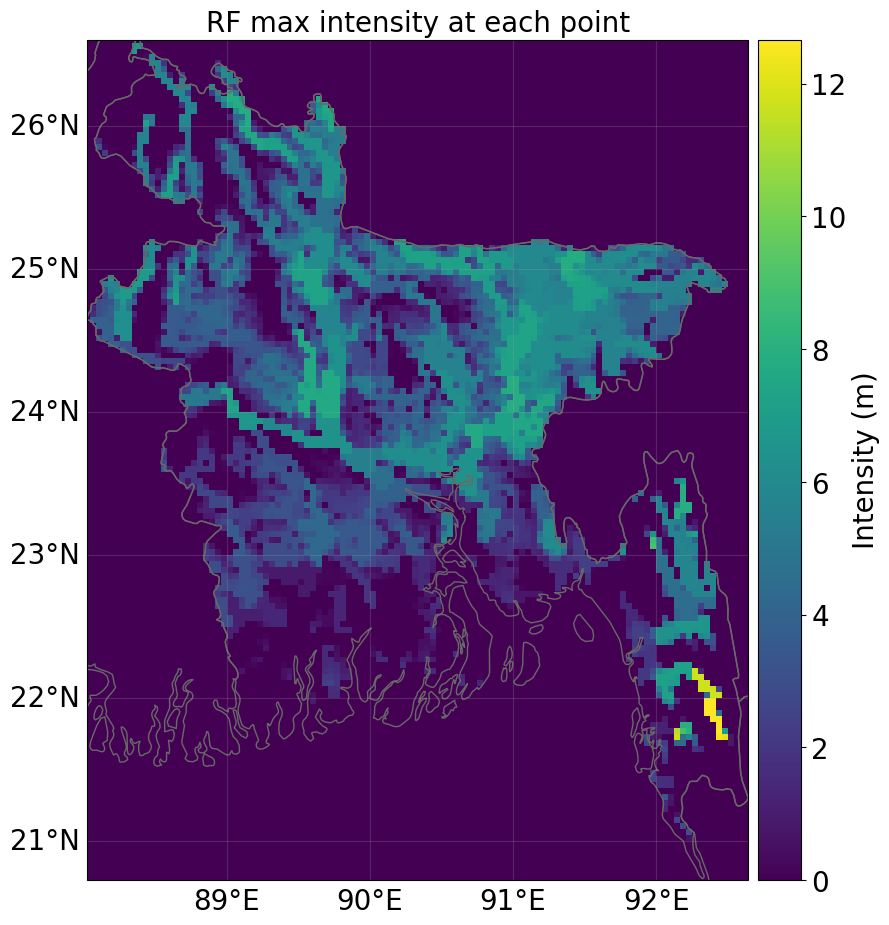

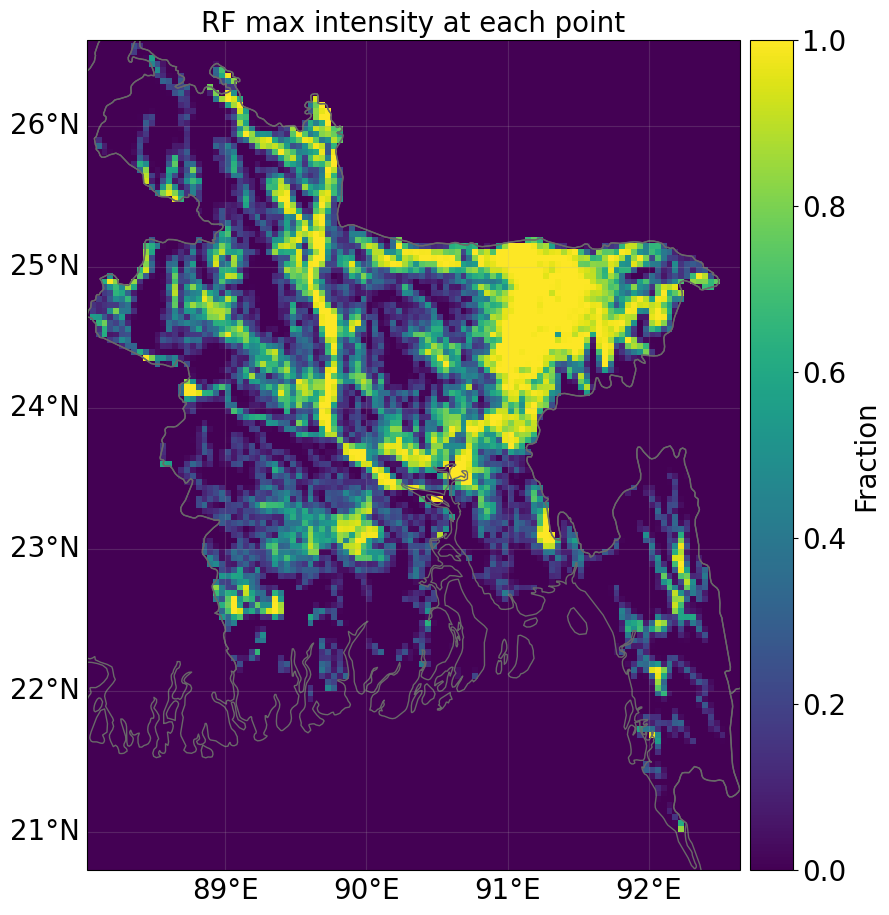

In [165]:
# plotting intensity (Flood depth in m)
rf.plot_intensity(event=0, smooth = False)
# plotting fraction flooded
rf.plot_fraction(event=0, smooth = False)

# Calculating Flooded Area

In [166]:
# calculating flooded area
rf.set_flooded_area()

print("Total annual flooded area:")
print(str(rf.fla_annual[0]) + " m2")

/Users/arnaudgoussebaile/miniconda3/envs/climada_env/lib/python3.9/site-packages/climada/hazard/centroids/centr.py:873: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xy_pixels = self.geometry.buffer(res / 2).envelope


Total annual flooded area:
27652656552.344185 m2


# Setting JRC damage functions

In [167]:
from climada_petals.entity.impact_funcs.river_flood import ImpfRiverFlood,flood_imp_func_set
impf_set = flood_imp_func_set()

# Deriving flood impact with LitPop exposure

In [168]:
from climada.entity import LitPop
lp_exp = LitPop.from_countries(['BGD'], fin_mode='pc')
lp_exp.gdf

2024-03-21 14:32:19,639 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-21 14:32:19,683 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-21 14:32:19,715 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-21 14:32:19,754 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-21 14:32:19,783 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-21 14:32:19,823 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-03-21 14:32:19,870 - climada.entity.exposures.litpop.gpw_populati

,value,latitude,longitude,geometry,region_id,impf_
0,21613.977599,21.912500,89.045833,POINT (89.04583 21.91250),50,1
1,21224.584254,21.912500,89.054167,POINT (89.05417 21.91250),50,1
2,188.115872,21.912500,89.062500,POINT (89.06250 21.91250),50,1
3,19238.047504,21.904167,89.054167,POINT (89.05417 21.90417),50,1
4,0.000000,21.904167,89.062500,POINT (89.06250 21.90417),50,1
...,...,...,...,...,...,...
174736,115158.329961,22.404167,91.520833,POINT (91.52083 22.40417),50,1
174737,115158.329961,22.404167,91.529167,POINT (91.52917 22.40417),50,1
174738,115158.344381,22.404167,91.537500,POINT (91.53750 22.40417),50,1
174739,115158.329961,22.404167,91.545833,POINT (91.54583 22.40417),50,1


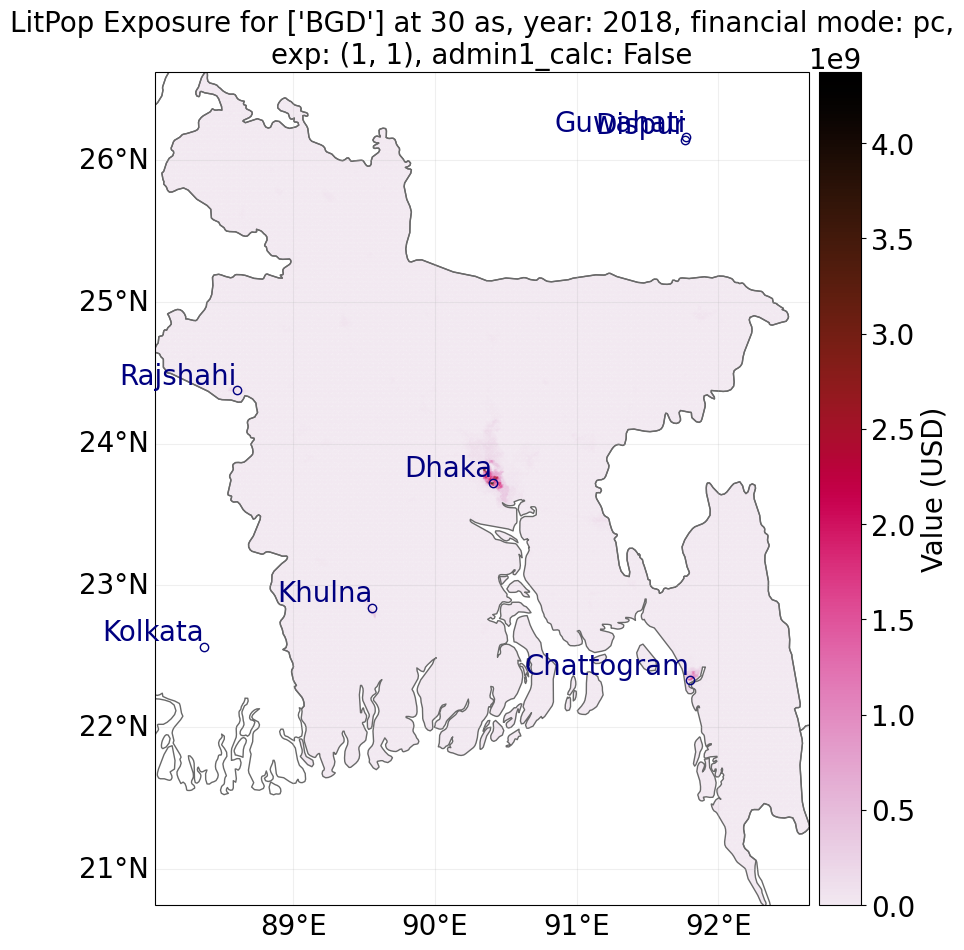

In [169]:
# In the LitPop exposure the damage function for river floods needs
# to be specified manually.
import pandas as pd
from climada_petals.util.constants import RIVER_FLOOD_REGIONS_CSV

info = pd.read_csv(RIVER_FLOOD_REGIONS_CSV)
lp_exp.gdf['impf_RF'] = info.loc[info['ISO']=='BGD','impf_RF'].values[0]
lp_exp
lp_exp.plot_hexbin(pop_name=True);

2024-03-21 14:32:36,666 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.


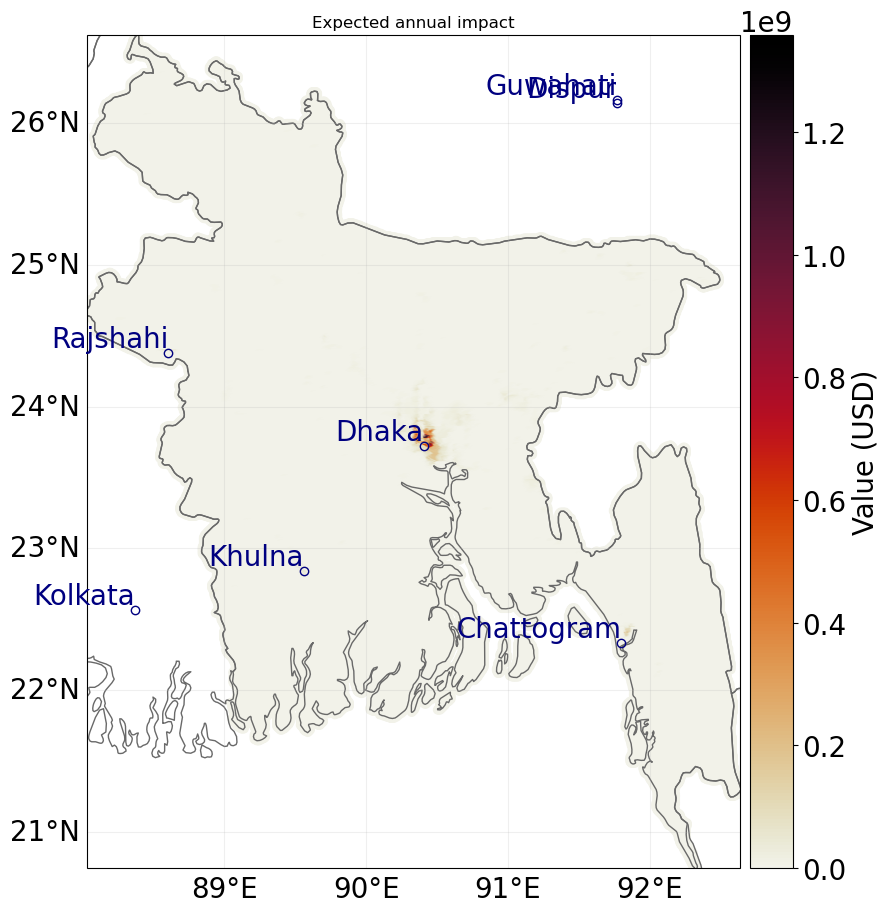

In [170]:
from climada.engine import Impact

imp=Impact()
imp.calc(lp_exp,impf_set,rf,save_mat=True)
imp.plot_scatter_eai_exposure();